# Clustering
在“无监督学习”（unsupervised learning）中，训练样本的标记信息是未知的，目标是通过对无标记训练样本的学习来揭示数据的内在性质及规律，为进一步的数据分析提供基础。在本次实验中，我们将实现一个K-means算法和GMM算法来对我们的数据集进行聚类；

## 一、K-Means Clustering
下面我们开始实现一个K-Means算法，首先你需要加载一下我们数据集（data.txt）, 然后进行可视化。

The shape of X is: (3000, 2)


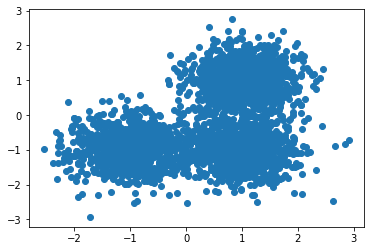

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

data = np.loadtxt('./data.txt', delimiter=' ')
X = data[:, 0:2].reshape(-1, 2)

print('The shape of X is:',X.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

从上面代码的输出可知，我们的数据是2D的，并且从可视化的结果可以看出这些数据大致上可以分为3个簇，因此我们将聚类簇的个数K定为3. 
接下来我们需要初始化聚类簇中心centroids.
### 1. 初始化centroids
一个很好的初始化centroids的策略就是在训练集中随机的选择K个样本作为K个聚类簇的中心，下面你将要实现随机初始化的代码。随机种子设为5。  
**任务1**：随机初始化centroids.

初始centroids为： [[ 0.89 -1.23]
 [ 0.87 -0.28]
 [ 0.84 -0.66]]


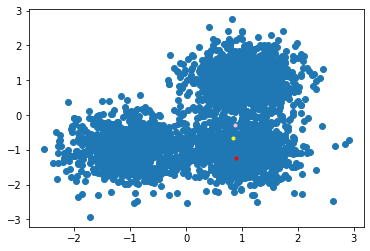

In [3]:
#设置聚类簇的个数
K=3

#随机初始化centroids
def kMeansInitCentroids(X, K):
    """
    随机初始化centroids
    :param X: 训练样本
    :param K: 聚类簇个数
    :return: 初始化的centroids
    """
    np.random.seed(5)
    
    #START CODE HERE#
    i = random.sample(range(0,3000),K)                #随机生成K个样本作为初始聚类中心
    centroids = X[i, :]
    #END CODE HERE#
    
    return centroids

#下面来测试一下
initial_centroids = kMeansInitCentroids(X, K)
print('初始centroids为：', initial_centroids)
#可视化一下
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], c='red', marker='.')
plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], c='pink', marker='.')
plt.scatter(initial_centroids[2, 0], initial_centroids[2, 1], c='yellow', marker='.')
plt.show()

可以看到上图中黄色、红色、粉红色三个点分别为初始的3个聚类簇中心。
### 2. 寻找最近的centroid
接下来，我们需要寻找训练集中每个样本离之最近的centroid，将这个样本赋予这个簇，并记录下相应centroid的索引，最后组成一个索引集index。整个过程用公式表示就是，对每个训练样本$i$，计算：$$index^{(i)}=argmin_k||x^{(i)}-centroids_{k}||^2$$ 
**任务2**：寻找每个样本离之最近的centroid

In [4]:
def findClosestCentroids(X, centroids):
    """
    寻找每个样本离之最近的centroid
    :param X: 训练集
    :param centroids:聚类簇中心
    :return: 索引集
    """
    K = centroids.shape[0]
    m = X.shape[0]
    index = np.empty([m]) 
    #START CODE HERE#
    distance = np.empty([K])                     
    for i in range(0,m):
        for j in range(0,K):
            distance[j] = np.linalg.norm(np.array(X[i]) - np.array(centroids[j]))                 
                                                       #求取每个点到centroids的距离，选取最短的作为归属点
        index[i]=np.argmin(distance)               #tips：np.argmin()可以返回距离最近的点对应的下标
    #END CODE
    
    return index

#测试一下
index = findClosestCentroids(X, initial_centroids)
print('前10个索引为：', index[0:10])

前10个索引为： [0. 1. 1. 1. 0. 0. 2. 1. 1. 1.]


### 3.更新centroids
接着，我们计算每个聚类簇中样本的平均值，然后将原来的簇中心更新为这个平均值，用公式表示就是：$$centroids_k=avg(x^{(i)}|index^{(i)}=k)$$ 
**任务3**：更新centroids

In [7]:
def computeCentroids(X, index, K):
    """
    更新聚类簇中心
    :param X: 训练集
    :param index: 索引集
    :param K: 聚类簇个数
    :return: 更新的聚类簇中心
    """
    [m, n] = X.shape
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###

    for i in range(0,K):
        list_index = np.where(index==i) 
       
        centroids[i,:] = np.sum(X[list_index,:] , axis = 1) / len(list_index[0])
    ### END CODE HERE ###
    return centroids

#测试一下
initial_centroids = computeCentroids(X, index, K)
print('更新后的centroids为：', initial_centroids)

更新后的centroids为： [[ 0.22238095 -1.40398942]
 [ 0.86411907  0.77923572]
 [-0.31041872 -0.75350985]]


### 4.整合
接下来我们整合一下前面的内容，对我们的数据集进行聚类，设置迭代次数为$l$为10.  
**任务4**：整合前面的内容，完成对数据集的聚类。

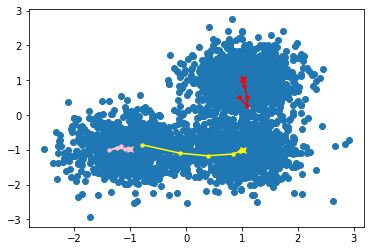

In [8]:
#设置迭代次数为10
l = 10

#初始化聚类簇中心centroids
#START CODE HERE#
centroids =  kMeansInitCentroids(X, K)
#END CODE HERE

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', marker='.')
plt.scatter(centroids[1, 0], centroids[1, 1], c='pink', marker='.')
plt.scatter(centroids[2, 0], centroids[2, 1], c='yellow', marker='.')
precious_centroids = centroids    #记录之前的centroids，只为可视化
for i in range(l):
    
    #START CODE HERE#
    index = findClosestCentroids(X, centroids)
    #END CODE HERE
    
    precious_centroids = centroids
    
    #更新centroids
    
    #START CODE HERE#
    centroids = computeCentroids(X, index, K)
    #END CODE HERE
    
    if i != l-1:
        plt.plot([precious_centroids[0, 0], centroids[0, 0]], [precious_centroids[0, 1], centroids[0, 1]], c='red', marker='.')
        plt.plot([precious_centroids[1, 0], centroids[1, 0]], [precious_centroids[1, 1], centroids[1, 1]], c='pink', marker='.')
        plt.plot([precious_centroids[2, 0], centroids[2, 0]], [precious_centroids[2, 1], centroids[2, 1]], c='yellow', marker='.')
    else:
        plt.scatter(centroids[0, 0], centroids[0, 1], c='red', marker='x')
        plt.scatter(centroids[1, 0], centroids[1, 1], c='pink', marker='x')
        plt.scatter(centroids[2, 0], centroids[2, 1], c='yellow', marker='x')
plt.show()

从上图可以看出3个聚类簇中心在每次迭代后更新的方向，经过10次迭代后，最后的聚类簇中心点分别在上图中用‘×’标记出来了，可以看到，最终的中心点位置和我们直观的感受基本一致，下面，我们来对数据集进行聚类，即进行“染色”操作。

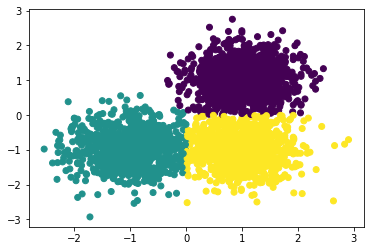

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=index)
plt.show()

如果顺利的话，你会看到数据被划分为3个簇，我们用不同的颜色标记出了不同的簇。
接下来，我们使用GMM来重新对这些数据进行聚类。  
# 二、GMM Clustering  
与K-Means聚类不同，高斯混合聚类采用概率模型来表达聚类原型。
我们先简单回顾一下多元高斯分布的定义，对$n$维样本空间$\chi$中的随机向量$x$，若$x$服从高斯分布，其概率密度函数为：$$\large p(x|\mu,\Sigma ) = \frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma |^{\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu)^T\Sigma ^{-1}(x-\mu)} \tag{1}$$  
其中$\mu$是$n$维均值向量，$\sum$是$n \times n$的协方差矩阵。由公式(1)可以看出，高斯分布完全由均值向量$\mu$和协方差矩阵$\sum$这两个参数确定。为了明确显示高斯分布与相应参数的依赖关系，将概率密度函数记为$\large p(x|\mu,\Sigma )$.  
我们可以定义高斯混合分布为：$$\large p_{M}(x)=\sum_{i=1}^k\alpha_i \cdot p(x|\mu_i,\Sigma_i) \tag{2}$$
该分布共由$k$个混合成分组成，每个混合成分对应一个高斯分布，其中$\mu_i$与$\sum_i$是第$i$个高斯混合成分的参数，而$\alpha_i>0$为相应的“混合系数”，$\sum_{i=1}^k\alpha_i=1$.  
假设样本的生成过程由高斯混合分布给出：首先，根据$\alpha_1,\alpha_2,...,\alpha_k$定义的先验分布选择高斯混合成分，其中$\alpha_i$为选择第$i$个混合成分的概率；然后，根据被选择的混合成分的概率密度函数进行采样，从而生成相应的样本。  
若训练集$D={x_1,x_2,...,x_m}$由上述过程生成，令随机变量$z_j\in {1,2,..k}$表示生成样本$x_j$的高斯混合成分，其取值未知。显然，$z_j$的先验概率$P(z_j=i)$对应于$\alpha_i(1,2,...,k)$。根据贝叶斯定理，$z_j$的后验分布对应于：  
$$\large \begin{align*}
p_M(z_j=i|x_j)&= \frac{P(z_j=i)·p_M(x_j|z_j=i)}{p_M(x_j)}  \\
&= \frac{\alpha_i·p(x_j|\mu_i,\Sigma_i)}{\sum_{l=1}^k\alpha_lp(x_j|\mu_l,\Sigma_l)} \\
\end{align*} \tag{3}$$  
换言之，$p_M(z_j=i|x_j)$给出了样本$x_j$由第$i$个高斯混合成分生成的后验概率，为方便叙述，将其简记为$\gamma_{ji}(i=1,2,...,k)$.  
当高斯混合分布(2)已知时，高斯混合聚类将样本集$D$划分为$k$个簇$C={C_1,C_2,...,C_k}$，每个样本$x_j$的簇标记$\lambda_j$如下确定：$$\large \lambda_j=\underset{i\in {1,2,...,k}}{argmax} \quad {\gamma_{ji}} \tag{4}$$  
因此，从原型聚类的角度来看，高斯混合聚类是采用概率模型（高斯分布）对原型进行刻画，簇划分则由原型对应后验概率确定。  
那么对于式(2)，模型参数$\{(\alpha_i,\mu_i,\Sigma_i)\}$如何求解呢？显然，给定样本集$D$，可采用极大似然估计，即最大化对数似然$$\large \begin{aligned}LL(D) &= ln\bigg(\prod_{j=1}^{m}p_M(x_j)\bigg) \\ &= \sum_{j=1}^{m}ln\bigg(\sum_{i=1}^{k}\alpha_i \cdot p(x_j|\mu_i,\Sigma_i)\bigg)\end{aligned} \tag{5}$$  
常采用EM算法进行迭代优化求解。下面我们做一个简单的推导。  
若参数$\{(\alpha_i,\mu_i,\Sigma_i)|1\leqslant i \leqslant k\}$能使式(5)最大化，则由$\frac{\partial LL(D)}{\partial \mu_i}=0$有：$$\large \sum_{j=1}^{m}\frac{\alpha_i \cdot p(x_j|\mu_i,\Sigma_i)}{\sum_{l=1}^{m}\alpha_l \cdot p(x_j|\mu_l,\Sigma_l)}(x_j-\mu_i)=0 \tag{6}$$  
由式(3)以及$\gamma_{ji}=p_M(z_j=i|x_j)$，有：$$\large \mu_i=\frac{\sum_{j=1}^{m}\gamma_{ji}x_j}{\sum_{j=1}^{m}\gamma_{ji}} \tag{7}$$  
即各混合成分的均值可通过样本加权平均来估计，样本权重式每个样本属于该成分的后验概率。类似的，由$\frac{\partial LL(D)}{\partial \Sigma_i}=0$可得：$$\large \Sigma_i=\frac{\sum_{j=1}^{m}\gamma_{ji}(x_j-\mu_i)(x_j-\mu_i)^T}{\sum_{j=1}^{m}\gamma_{ji}} \tag{8}$$  
对于混合系数$\alpha_i$，除了要最大化$LL(D)$，还需要满足$\alpha_i \geqslant 0,\sum_{i=1}^{k}\alpha_i=1$.考虑$LL(D)$的拉格朗日形式：$$\large LL(D)+\lambda \bigg(\sum_{i=1}^{k}\alpha_i-1\bigg)\tag{9}$$  
其中$\lambda$为拉格朗日乘子。由式(9)对$\alpha_i$的导数为0，有：$$\large \sum_{j=1}^{m}\frac{p(x_j|\mu_i,\Sigma_i)}{\sum_{l=1}^{k}\alpha_l \cdot p(x_j|\mu_l,\Sigma_l)}+\lambda=0 \tag{10}$$  
两边同乘以$\alpha_i$，对所有混合成分求和可知$\lambda=-m$，有：$$\large \alpha_i=\frac{1}{m}\sum_{j=1}^{m}\gamma_{ji} \tag{11}$$  
即每个高斯成分的混合系数由样本属于该成分的平均后验概率确定。  
综上所述，高斯混合聚类算法描述如下图所示：  
![](./GMM_algorithm.png)


下面，我们将按照上面的伪代码来实现一个GMM聚类算法。
### 1.准备数据和导入必要的包
由于算法中需要使用到多元高斯概率密度函数，在实现过程中可能会产生误差，所以我们统一使用scipy框架里面的multivariate_normal函数来计算。关于scipy的安装，可以自行搜索网上的教程，作为一个双一流大学的同学，应该熟练掌握通用包的安装。

In [10]:
from scipy.stats import multivariate_normal

#为了后面运算方便，我们先将数据转换为matrix
data = np.matrix(X, copy=True)
#和之前一样，将簇的数量K定为3
K=3

### 2.多元高斯概率密度函数
下面的代码运行即可。

In [11]:
def mul_normal(X, mu, sigma):
    """
    多元高斯概率密度函数
    :param X: 数据
    :param mu: 均值向量
    :param sigma: 协方差矩阵
    :return: 对应高斯分布下，所有样本的概率
    """
    normal = multivariate_normal(mean=mu, cov=sigma)
    return normal.pdf(X)

### 3.初始化高斯混合分布的模型参数
$\mu_i$执行随机初始化，$\Sigma_i$初始化为单位矩阵，$\alpha_i$初始化为$\frac{1}{K}$，为了更加有利于后面代码的书写，下面的初始化程序直接执行即可，特别要注意的是你必须清晰的了解每个变量具体是什么类型的，是matrix还是array，这对后面的计算有好处。后续程序请一定按照每个变量的类型进行计算。  

In [12]:
def init_parameters(data, K):
    """
    初始化高斯混合分布的模型参数
    :param data:数据集 
    :param K: 簇的个数
    :return: 初始化后的mu,sigma,alpha
    """
    np.random.seed(0)    #初始化种子
    m, n = data.shape    #m为样本数量，n为特征数量
    
    mu = np.random.rand(K, n)
    sigma = np.array([np.eye(n)] * K)
    alpha = np.array([1.0 / K] * K)
    
    return mu, sigma, alpha

### 4.EM算法的E步
为了更好的理解，我们将EM算法的E步和M步分开进行  
**提示：**由于这部分（包括后面）代码的实现方法多种多样，所以会采用更加开放的方式，你只需要返回正确的gamma即可，你可以用很多的for循环，但是我们还是鼓励大家尽量用矩阵运算，“消灭”for循环。  
**任务5：**完成EM算法的E步骤  

In [13]:
def Expectation(data, mu, sigma, alpha, K):
    """
    EM算法的E步
    :param data:数据集
    :param mu:均值向量
    :param sigma:协方差矩阵
    :param alpha:混合系数
    :return:各混合成分生成的后验概率gamma
    """
    m = data.shape[0]    #m为样本数量

    #初始化后验概率矩阵gamma
    gamma = np.zeros((m, K))
    
    #START CODE HERE#
    temp_gamma = np.zeros((m , K))
    for i in range(0,K):
        temp_gamma[:,i] = alpha[i]*mul_normal(data, mu[i], sigma[i]) #计算各模型中所有样本出现的概率，行对应样本，列对应模型
    gamma = temp_gamma/np.sum(temp_gamma , axis = 1 , keepdims=True)               #最终结果在K个分布上的概率和应该做归一化处理
                                  
    #END CODE HERE#
    
    return gamma

#测试一下
mu_test, sigma_test, alpha_test = init_parameters(data, K)
gamma_test = Expectation(data, mu_test, sigma_test, alpha_test, K)
#打印前10个
print(gamma_test[0:10, :])

[[0.27926041 0.41488758 0.30585201]
 [0.33855553 0.31438905 0.34705542]
 [0.32877483 0.34119351 0.33003167]
 [0.36472108 0.33078144 0.30449749]
 [0.26201086 0.43229054 0.3056986 ]
 [0.27737269 0.41066866 0.31195865]
 [0.2963848  0.36449846 0.33911674]
 [0.34046085 0.36464825 0.29489089]
 [0.34252555 0.34306642 0.31440803]
 [0.34066638 0.31310663 0.34622698]]


### 5.EM算法的M步
**提示：**和上一步一样，此处你只需要返回正确的$\mu,\Sigma,\alpha$即可，尽量少用“for”循环。  
**任务6：**完成EM算法的M步骤

In [16]:
def Maximization(data, gamma):
    """
    更新模型参数
    :param data:数据集 
    :param gamma:各混合成分生成的后验概率 
    :return:更新后的模型参数 
    """
    m, n = data.shape    #m为样本数，n为特征数
    sigma=[]
    alpha=[]
    #START CODE HERE#
    mu = np.zeros((K,n))                        #提取K
    for i in range(K): # 按着公式来就好了
        mu[i , :] = gamma[: , i].reshape(1 , m) * data / np.sum(gamma[: , i] , axis = 0)
        sigmak = (data-mu[i]).T * np.multiply(gamma[: , i].reshape(m , 1) , (data-mu[i])) / np.sum(gamma[: , i] , axis = 0)
        sigma.append(sigmak)
        alpha = np.sum(gamma , axis = 0) / m                 #更新每个高斯混合成分的模型参数mu、sigma、alpha
        #END CODE HERE
    
    return mu, sigma, alpha

#测试一下
mu_test, sigma_test, alpha_test = Maximization(data, gamma_test)
#打印
print("The mu_test is:",mu_test)
print("The sigma_test is:",sigma_test)
print("The alpha_test is:",alpha_test)

The mu_test is: [[ 0.40729641 -0.21531751]
 [ 0.39499207 -0.38839127]
 [ 0.23195875 -0.35311593]]
The sigma_test is: [matrix([[1.09405764, 0.45442549],
        [0.45442549, 1.1883895 ]]), matrix([[1.11085862, 0.38770788],
        [0.38770788, 1.10681648]]), matrix([[1.18905033, 0.46874545],
        [0.46874545, 1.10981631]])]
The alpha_test is: [0.30744145 0.35697314 0.33558541]


### 6.整合
下面将高斯混合聚类算法进行整合  
**任务7：**整合高斯混合聚类算法，对我们的数据进行聚类

The first 10 elements in gamma is: [[7.19238109e-06 9.99590239e-01 4.02568641e-04]
 [9.98954907e-01 8.43714591e-04 2.01378679e-04]
 [9.61879109e-01 3.78303210e-02 2.90570157e-04]
 [9.99996223e-01 3.77714219e-06 4.21924890e-11]
 [6.05856138e-08 9.98657039e-01 1.34289993e-03]
 [5.66085810e-06 9.98127708e-01 1.86663117e-03]
 [3.77445635e-03 7.81517115e-01 2.14708429e-01]
 [9.93991137e-01 6.00884977e-03 1.36614537e-08]
 [9.98357801e-01 1.64194208e-03 2.56967788e-07]
 [9.99425237e-01 4.84772029e-04 8.99910125e-05]]


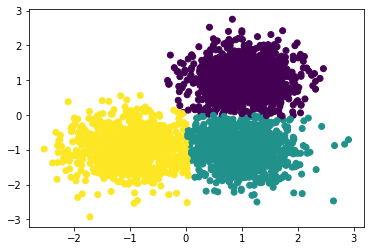

In [12]:
def GMM_EM(data, K, iterations):
    """
    高斯混合聚类算法
    :param data:数据集 
    :param K:簇数量 
    :param iterations:迭代次数 
    :return: 
    """
    mu, sigma, alpha = init_parameters(data, K)
    for i in range(iterations):
        #START CODE HERE#

        gamma = Expectation(data , mu , sigma , alpha , K)
        mu , sigma , alpha = Maximization(data , gamma)  
        #END CODE HERE#
    #用最终的模型参数来计算所有样本对于各混合成分的后验概率，以此作为最终簇划分的依据
    gamma = Expectation(data, mu, sigma, alpha, K)
    return gamma

#所有准备工作做好后，就可以开始对我们的数据进行聚类了
gamma = GMM_EM(data, K, 100)
#打印前10个gamma里的内容
print("The first 10 elements in gamma is:", gamma[0:10,:])
category = gamma.argmax(axis=1)
plt.scatter(X[:, 0], X[:, 1], c=category)
plt.show()

### 7.总结
至此，我们就完成了GMM聚类算法，理想情况下你会看到上图中，我们的数据集被染成了3种颜色，你也可以对比一下K-Means算法和GMM聚类算法的效果。